In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim.sgd import SGD
from torch.nn.parameter import Parameter
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
# 定义数据集
class my_dataset(Dataset):
    def __init__(self):
        super(my_dataset,self).__init__()
        self.path = '../../data/z=x+y.npy'
        self.data = np.load(self.path)
    def __getitem__(self, index):
        return np.array(self.data[index],dtype=np.float32)
    
    def __len__(self):
        return self.data.shape[0]

In [3]:
# 定义模型
class my_model(nn.Module):
    def __init__(self):
        super(my_model,self).__init__()
        self.linear = nn.Linear(2,1,bias=False)
    
    def forward(self, x):
        x = self.linear(x)
        return x

In [4]:
class Loss(nn.Module):
    def __init__(self):
        super(Loss, self).__init__()
    
    def forward(self, x, y):
        distance = 1/2 * (y - x) ** 2
        loss = torch.sum(distance)
        loss_mean = loss / x.shape[0]
        return loss_mean

In [5]:
# 超参数设置
batch_size = 16
num_workers = 0
lr = 0.005
epochs = 6000

In [12]:
my_data = my_dataset()
my_dataloader = DataLoader(my_data,batch_size,num_workers=num_workers,drop_last=True,shuffle=True)
model = my_model()
# init_weight = torch.tensor([[0.5455, 0.0551]])
init_weight = torch.tensor([[0, -9.]])
model.linear.weight = Parameter(init_weight)
loss_f = Loss()
# 定义优化器
optimizer = SGD(model.parameters(),lr=lr)

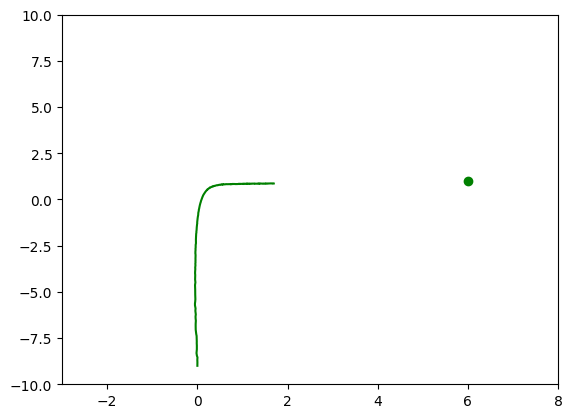

tensor([[ -0.1764, -38.2458]])
tensor([[  0.3695, -26.9653]])
tensor([[ -0.5849, -26.1523]])
tensor([[  2.3389, -16.7331]])
tensor([[  1.8885, -29.2734]])
tensor([[ -1.4979, -40.2071]])
tensor([[ -0.0462, -41.0996]])
tensor([[  0.5448, -25.8363]])
tensor([[ -0.1798, -18.4081]])
tensor([[  0.3085, -27.7846]])
tensor([[  0.4183, -32.7702]])
tensor([[  1.5758, -18.6087]])
tensor([[  1.5249, -32.4787]])
tensor([[  0.8451, -15.6007]])
tensor([[ -0.1195, -24.2015]])
tensor([[  0.3876, -15.7622]])
tensor([[ -0.0462, -24.0328]])
tensor([[ -0.8006, -33.8051]])
tensor([[  1.0593, -24.4595]])
tensor([[  0.3394, -21.0023]])
tensor([[ -1.1537, -22.0779]])
tensor([[  1.0499, -21.8950]])
tensor([[  0.8161, -17.0816]])
tensor([[ -0.7682, -26.8786]])
tensor([[  1.5998, -17.9592]])
tensor([[  0.9298, -15.4166]])
tensor([[  0.0247, -20.4708]])
tensor([[ -0.9685, -17.6968]])
tensor([[ -0.8597, -28.1152]])
tensor([[  0.4127, -23.3200]])
tensor([[  0.2446, -25.3863]])
tensor([[ -0.0719, -14.1102]])
tensor([

KeyboardInterrupt: 

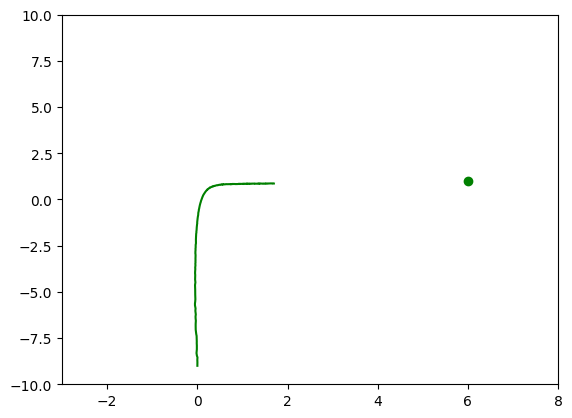

In [13]:
x = np.linspace(0,10,100).astype(np.float32)
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(-3, 8)
ax.set_ylim(-10, 10)
display(fig, display_id='plot')
point_final = np.array([6,1])
point_tmp_list = np.array([[0, -9.]])
mean_data = torch.tensor([0.5694,3.1697,6.5862])
std_data = torch.tensor([0.2853,1.7863,2.2277])
for epoch in range(epochs):
    for data in my_dataloader:
        data = data - mean_data.unsqueeze(0).repeat(batch_size,1)
        # data = data/std_data.unsqueeze(0).repeat(batch_size,1)
        output = model(data[:,:-1])
        loss = loss_f(output, data[:,-1:])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(optimizer.param_groups[0]['params'][0]._grad)
        # print(model.linear.weight)
        point_tmp = model.linear.weight.data.numpy()
        point_tmp_list = np.concatenate([point_tmp_list,point_tmp],axis=0)
        ax.set_xlim(-3, 8)
        ax.set_ylim(-10, 10)
        ax.scatter(point_final[0],point_final[1],marker='o', c='g')
        ax.plot(point_tmp_list[:,0], point_tmp_list[:,1], color='green')
        # ax.plot(data_true[:,0], data_true[:,1], color='red')
        display(fig, display_id='plot',update=True)
        ax.clear()

In [15]:
my_data = my_dataset()
my_dataloader = DataLoader(my_data,batch_size=100,num_workers=num_workers,drop_last=True,shuffle=True)
model = my_model()
# init_weight = torch.tensor([[0.5455, 0.0551]])
init_weight = torch.tensor([[6.75, -9.]])
model.linear.weight = Parameter(init_weight)
loss_f = Loss()
# 定义优化器
optimizer = SGD(model.parameters(),lr=lr)
range_ = 10
point_final = np.array([6,1])
point_tmp_list = np.array([[0,0]])
x_list = np.array(np.linspace(-1.5-range_,-1.5+range_,range_*20),dtype=np.float32)
y_list = np.array(np.linspace(1-range_,1+range_,range_*20),dtype=np.float32)
whole_list = np.zeros([range_*20,range_*20])
whole_loss_list = np.zeros([range_*20,range_*20])
w1_list = np.zeros([range_*20,range_*20])
w2_list = np.zeros([range_*20,range_*20])
for i,x in enumerate(x_list):
    for j,y in enumerate(y_list):
        init_weight = torch.tensor([[x, y]])
        model.linear.weight = Parameter(init_weight)
        optimizer = SGD(model.parameters(),lr=lr)
        for data in my_dataloader:
            # 均值 方差 归一化
            mean_data = torch.mean(data,dim=0)
            data = data - mean_data.unsqueeze(0).repeat(100,1)
            std_data = torch.std(data,dim=0)
            data = data/std_data.unsqueeze(0).repeat(100,1)

            # 

            output = model(data[:,:-1])
            loss = loss_f(output, data[:,-1:])
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            grad = optimizer.param_groups[0]['params'][0]._grad

            print(torch.norm(grad))
            whole_list[-(j+1),i] = torch.norm(grad).numpy()
            whole_loss_list[-(j+1),i] = loss.data.numpy()
            w1_list[-(j+1),i] = grad[0][0].numpy()
            w2_list[-(j+1),i] = grad[0][1].numpy()

            # whole_list[-(i+1),j] = torch.norm(grad).numpy()
            # w1_list[-(i+1),j] = grad[0][0].numpy()
            # w2_list[-(i+1),j] = grad[0][1].numpy()
    # print(model.linear.weight)

tensor(12.6919)
tensor(12.6495)
tensor(12.6077)
tensor(12.5667)
tensor(12.5263)
tensor(12.4866)
tensor(12.4476)
tensor(12.4093)
tensor(12.3718)
tensor(12.3349)
tensor(12.2988)
tensor(12.2634)
tensor(12.2287)
tensor(12.1948)
tensor(12.1616)
tensor(12.1291)
tensor(12.0975)
tensor(12.0666)
tensor(12.0365)
tensor(12.0071)
tensor(11.9786)
tensor(11.9508)
tensor(11.9238)
tensor(11.8976)
tensor(11.8723)
tensor(11.8477)
tensor(11.8240)
tensor(11.8010)
tensor(11.7789)
tensor(11.7577)
tensor(11.7372)
tensor(11.7177)
tensor(11.6989)
tensor(11.6810)
tensor(11.6640)
tensor(11.6478)
tensor(11.6324)
tensor(11.6180)
tensor(11.6044)
tensor(11.5916)
tensor(11.5798)
tensor(11.5688)
tensor(11.5587)
tensor(11.5494)
tensor(11.5411)
tensor(11.5336)
tensor(11.5270)
tensor(11.5213)
tensor(11.5165)
tensor(11.5126)
tensor(11.5096)
tensor(11.5074)
tensor(11.5062)
tensor(11.5058)
tensor(11.5063)
tensor(11.5078)
tensor(11.5101)
tensor(11.5133)
tensor(11.5174)
tensor(11.5224)
tensor(11.5282)
tensor(11.5350)
tensor(1

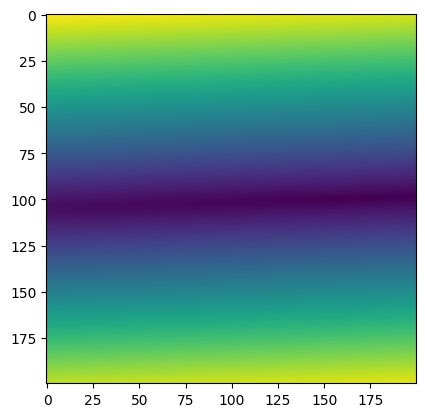

In [7]:
plt.imshow(whole_list)


In [69]:
np.min(whole_list)

0.0507560633122921

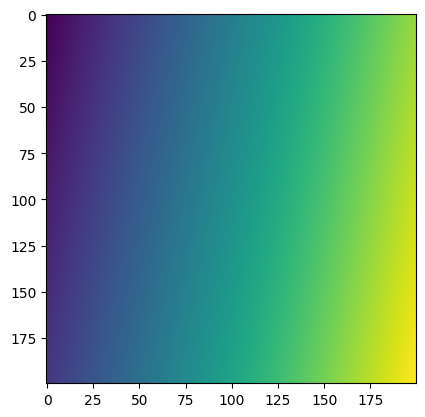

In [70]:
plt.imshow(w1_list)

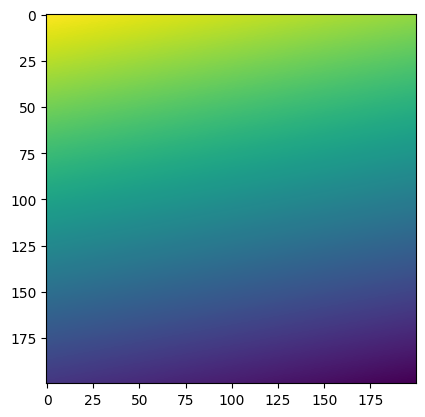

In [71]:
plt.imshow(w2_list)

In [76]:
model(torch.tensor([[(3-0.5694)/0.2853,(7-3.1697)/1.7863]])) * 2.2277 + 6.5862 # 正确的

tensor([[25.0001]], grad_fn=<AddBackward0>)